<a href="https://colab.research.google.com/github/Natassiam/machineLearning/blob/regression/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Atividade 5 da Disciplina de Tópicos Especiais II - Mineração de Dados Educacionais

Aluna: Natássia Rafaelle Medeiros Siqueira
Esta atividade visa analisar dados, utilizando um modelo de Regressão.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('/content/student-mat.csv', delimiter=';')

In [ ]:
df.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00
mean,16.70,2.75,2.52,1.45,2.04,0.33,3.94,3.24,3.11,1.48,2.29,3.55,5.71,10.91,10.71,10.42
std,1.28,1.09,1.09,0.70,0.84,0.74,0.90,1.00,1.11,0.89,1.29,1.39,8.00,3.32,3.76,4.58
min,15.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,3.00,0.00,0.00
25%,16.00,2.00,2.00,1.00,1.00,0.00,4.00,3.00,2.00,1.00,1.00,3.00,0.00,8.00,9.00,8.00
50%,17.00,3.00,2.00,1.00,2.00,0.00,4.00,3.00,3.00,1.00,2.00,4.00,4.00,11.00,11.00,11.00
75%,18.00,4.00,3.00,2.00,2.00,0.00,5.00,4.00,4.00,2.00,3.00,5.00,8.00,13.00,13.00,14.00
max,22.00,4.00,4.00,4.00,4.00,3.00,5.00,5.00,5.00,5.00,5.00,5.00,75.00,19.00,19.00,20.00


In [ ]:
pd.set_option('display.precision', 2)
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00
mean,16.70,2.75,2.52,1.45,2.04,0.33,3.94,3.24,3.11,1.48,2.29,3.55,5.71,10.91,10.71,10.42
std,1.28,1.09,1.09,0.70,0.84,0.74,0.90,1.00,1.11,0.89,1.29,1.39,8.00,3.32,3.76,4.58
min,15.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,3.00,0.00,0.00
25%,16.00,2.00,2.00,1.00,1.00,0.00,4.00,3.00,2.00,1.00,1.00,3.00,0.00,8.00,9.00,8.00
50%,17.00,3.00,2.00,1.00,2.00,0.00,4.00,3.00,3.00,1.00,2.00,4.00,4.00,11.00,11.00,11.00
75%,18.00,4.00,3.00,2.00,2.00,0.00,5.00,4.00,4.00,2.00,3.00,5.00,8.00,13.00,13.00,14.00
max,22.00,4.00,4.00,4.00,4.00,3.00,5.00,5.00,5.00,5.00,5.00,5.00,75.00,19.00,19.00,20.00


### Visualização dos Dados

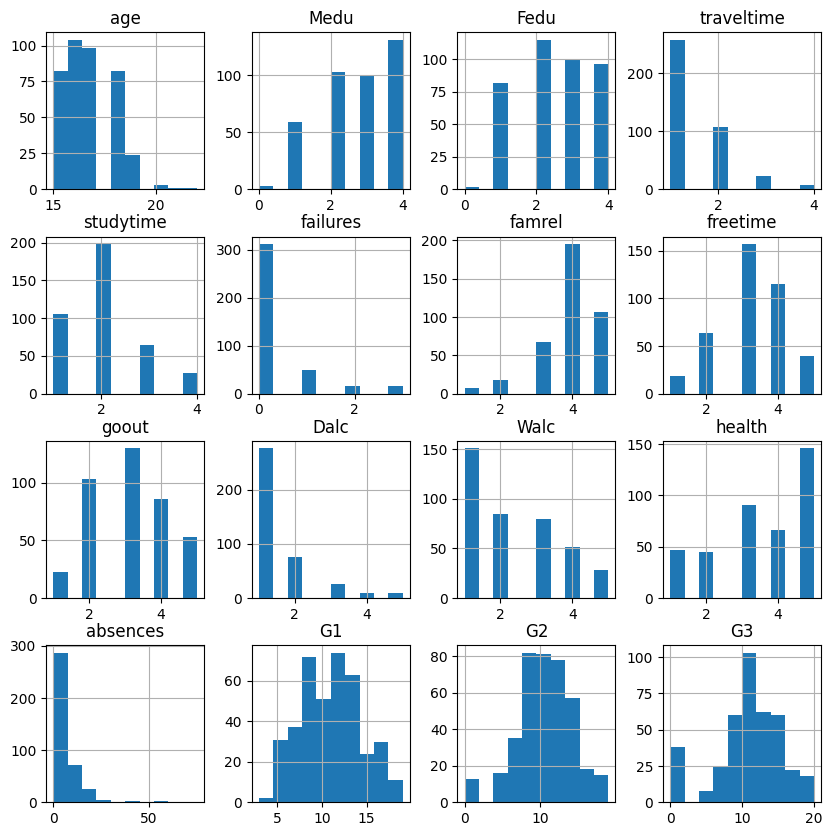

In [ ]:
from matplotlib import pyplot
df.hist(figsize=(10,10))
pyplot.show()

In [ ]:
from scipy.stats import shapiro
shapiro(df['G1'])

ShapiroResult(statistic=0.9749134463536321, pvalue=2.4541585453322648e-06)

,0
age,"Axes(0.125,0.712609;0.168478x0.167391)"
Medu,"Axes(0.327174,0.712609;0.168478x0.167391)"
Fedu,"Axes(0.529348,0.712609;0.168478x0.167391)"
traveltime,"Axes(0.731522,0.712609;0.168478x0.167391)"
studytime,"Axes(0.125,0.511739;0.168478x0.167391)"
failures,"Axes(0.327174,0.511739;0.168478x0.167391)"
famrel,"Axes(0.529348,0.511739;0.168478x0.167391)"
freetime,"Axes(0.731522,0.511739;0.168478x0.167391)"
goout,"Axes(0.125,0.31087;0.168478x0.167391)"
Dalc,"Axes(0.327174,0.31087;0.168478x0.167391)"


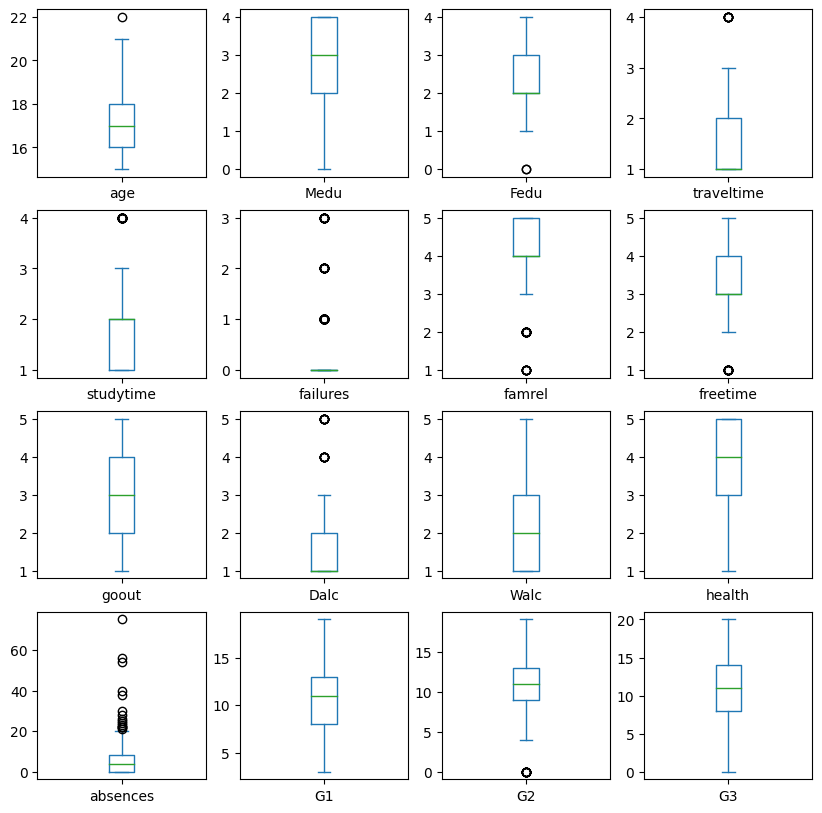

In [ ]:
df.plot(kind='box', subplots=True, layout=(4,4),figsize=(10,10),sharex=False)

### Pré processamento


In [ ]:
df = df.dropna(axis=1)

In [ ]:
duplicate_rows = df.duplicated()
print(duplicate_rows)

0      False
1      False
2      False
3      False
4      False
       ...  
390    False
391    False
392    False
393    False
394    False
Length: 395, dtype: bool


In [ ]:
y = df['G3']

In [ ]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
X = df[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2']]

In [ ]:
object_columns = X.select_dtypes(include=['object'])
object_columns.columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [ ]:
X = pd.get_dummies(X, columns=['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'])
X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,False,True,False,True,True,False,True,False
1,17,1,1,1,2,0,5,3,3,1,...,True,False,True,False,False,True,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,False,True,False,True,False,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,False,True,False,True,False,True,False,True,False,True
4,16,3,3,1,2,0,4,3,2,1,...,True,False,False,True,False,True,True,False,True,False


In [ ]:
dataset = pd.concat([X, y], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X = dataset.drop('G3', axis=1)
y = dataset['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Montando os cenários de dados (1) sem reescalar, (2) dados padronizados e (3) dados normalizados.

(1) Sem reescalar

In [ ]:
X_train

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
17,16,3,3,3,2,0,5,3,2,1,...,False,True,False,True,False,True,True,False,True,False
165,16,3,2,2,1,1,4,5,2,1,...,False,True,True,False,True,False,True,False,True,False
24,15,2,4,1,3,0,4,3,2,1,...,False,True,False,True,False,True,False,True,True,False
126,15,3,4,1,2,0,5,3,2,1,...,False,True,False,True,False,True,False,True,False,True
346,18,4,3,1,3,0,5,3,2,1,...,True,False,False,True,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,15,4,2,1,4,0,3,3,3,1,...,True,False,False,True,False,True,False,True,True,False
106,15,2,2,1,4,0,5,1,2,1,...,True,False,False,True,False,True,False,True,True,False
270,19,3,3,1,2,2,4,3,5,3,...,False,True,False,True,False,True,False,True,True,False
348,17,4,3,1,3,0,4,4,3,1,...,False,True,False,True,False,True,False,True,False,True


In [ ]:
import sklearn as sk
from sklearn.preprocessing import StandardScaler, MinMaxScaler

(2) Padronizados

In [ ]:
scaler_standard = StandardScaler()
X_train_scaled = scaler_standard.fit_transform(X_train)
X_test_scaled = scaler_standard.transform(X_test)

In [ ]:
X_train_scaled

array([[-0.5600082 ,  0.24410286,  0.45933515, ..., -2.32778965,
         0.72447352, -0.72447352],
       [-0.5600082 ,  0.24410286, -0.47975005, ..., -2.32778965,
         0.72447352, -0.72447352],
       [-1.33670299, -0.69162477,  1.39842035, ...,  0.42959208,
         0.72447352, -0.72447352],
       ...,
       [ 1.77007618,  0.24410286,  0.45933515, ...,  0.42959208,
         0.72447352, -0.72447352],
       [ 0.21668659,  1.1798305 ,  0.45933515, ...,  0.42959208,
        -1.3803127 ,  1.3803127 ],
       [-1.33670299,  1.1798305 ,  1.39842035, ...,  0.42959208,
         0.72447352, -0.72447352]])

(3) Normalizados

In [ ]:
scaler_normalized = MinMaxScaler()
X_train_normalized = scaler_normalized.fit_transform(X_train)
X_test_normalized = scaler_normalized.transform(X_test)

In [ ]:
X_train_normalized

array([[0.14285714, 0.75      , 0.75      , ..., 0.        , 1.        ,
        0.        ],
       [0.14285714, 0.75      , 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.5       , 1.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.57142857, 0.75      , 0.75      , ..., 1.        , 1.        ,
        0.        ],
       [0.28571429, 1.        , 0.75      , ..., 1.        , 0.        ,
        1.        ],
       [0.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.        ]])

### Treinando os modelos

Árvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeRegressor

(1) Sem escalar

In [ ]:
no_scale = DecisionTreeRegressor()
no_scale = no_scale.fit(X_train, y_train)
y_pred = no_scale.predict(X_test)

(2) Dados Padronizados

In [ ]:
dtr1 = DecisionTreeRegressor()
dtr1 = dtr1.fit(X_train_scaled, y_train)
y_pred_scaled = dtr1.predict(X_test_scaled)

(3) Dados Normalizados

In [ ]:
dtr2 = DecisionTreeRegressor()
dtr2 = dtr2.fit(X_train_normalized, y_train)
y_pred_normalized = dtr2.predict(X_test_normalized)

Regressão Linear

(1)

In [ ]:
no_scale_rl = LinearRegression()
no_scale_rl = no_scale_rl.fit(X_train, y_train)
y_pred_rl = no_scale_rl.predict(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

(2)

In [ ]:
rl = LinearRegression()
rl = rl.fit(X_train_scaled, y_train)
y_pred_scaled_rl = rl.predict(X_test_scaled)

(3)

In [ ]:
rl2 = LinearRegression()
rl2 = rl2.fit(X_train_normalized, y_train)
y_pred_normalized_rl = rl2.predict(X_test_normalized)


### Avaliação dos modelos

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
models = [
    "Árvore de Decisão (AD)Sem Escala",
    "Regressão Linear (RL) Sem Escala",
    "AD Com Escala (StandardScaler)",
    "AD Normalizado (MinMaxScaler)",
    "RL Com Escala (StandardScaler) RL",
    "RL Normalizado (MinMaxScaler) RL"
]

metrics = {
    "MAE": [],
    "MSE": [],
    "RMSE": [],
    "R²": []
}


In [ ]:
def evaluate_model(y_true, y_pred, label):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"Resultados para {label}:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}\n")

    metrics["MAE"].append(mae)
    metrics["MSE"].append(mse)
    metrics["RMSE"].append(rmse)
    metrics["R²"].append(r2)

In [ ]:
evaluate_model(y_test, y_pred, "Árvore de Decisão (AD) Regressão Sem Escala")
evaluate_model(y_test, y_pred_rl, "Regressão Linear (RL) Sem Escala")
evaluate_model(y_test, y_pred_scaled, "AD Com Escala (StandardScaler)")
evaluate_model(y_test, y_pred_normalized, "AD Normalizado (MinMaxScaler)")
evaluate_model(y_test, y_pred_scaled_rl, "RL Com Escala (StandardScaler)")
evaluate_model(y_test, y_pred_normalized_rl, "RL Normalizado (MinMaxScaler)")

Resultados para Árvore de Decisão (AD) Regressão Sem Escala:
MAE: 1.2857142857142858
MSE: 5.5210084033613445
RMSE: 2.3496826175807968
R²: 0.7488403022281618

Resultados para Regressão Linear (RL) Sem Escala:
MAE: 1.525230600052521
MSE: 4.993131054549658
RMSE: 2.2345315067256624
R²: 0.7728543057763946

Resultados para AD Com Escala (StandardScaler):
MAE: 1.361344537815126
MSE: 6.184873949579832
RMSE: 2.486940680752123
R²: 0.7186399732723394

Resultados para AD Normalizado (MinMaxScaler):
MAE: 1.2605042016806722
MSE: 5.07563025210084
RMSE: 2.2529159443043674
R²: 0.7691012824137133

Resultados para RL Com Escala (StandardScaler):
MAE: 1.525034520906938
MSE: 4.992512352591612
RMSE: 2.2343930613461036
R²: 0.7728824515398929

Resultados para RL Normalizado (MinMaxScaler):
MAE: 1.9301470588235294
MSE: 7.080652573529412
RMSE: 2.6609495623798307
R²: 0.6778895392891792



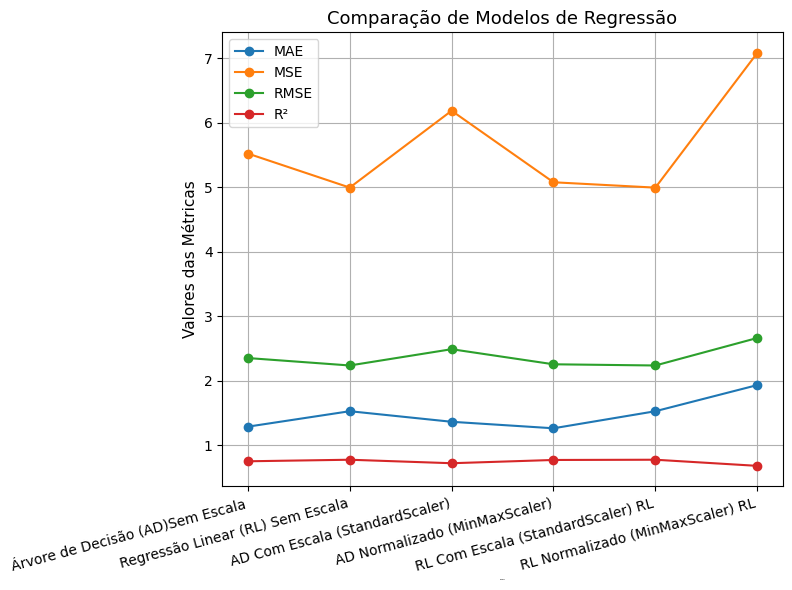

In [ ]:
plt.figure(figsize=(8, 6))

for metric_name in metrics:
    plt.plot(models, metrics[metric_name], marker='o', label=metric_name)

plt.title('Comparação de Modelos de Regressão', fontsize=13)
plt.xlabel('Modelos', fontsize=1)
plt.ylabel('Valores das Métricas', fontsize=11)
plt.xticks(rotation=15, ha='right')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Resultados:

**Análise das métricas**

MAE (Erro Absoluto Médio): O modelo com menor MAE é a Árvore de Decisão Normalizada (1.2605). No entanto, o MAE deve ser considerado em conjunto com outras métricas.

MSE (Erro Quadrático Médio) e RMSE (Raiz do Erro Quadrático Médio): O modelo Regressão Linear Sem Escala apresenta os menores valores de MSE (4.9931) e RMSE (2.2345), o que indica que ele tem uma performance sólida em termos de previsão, com menos penalização para erros maiores. Esses valores são mais importantes quando consideramos a variabilidade do erro.

R² (Coeficiente de Determinação): O R² para a Regressão Linear Sem Escala é de 0.7729, o que significa que este modelo explica cerca de 77.29% da variação nos dados. Isso é muito alto e sugere uma boa capacidade preditiva. Comparado aos outros modelos, ele se destaca neste aspecto.


**Análise Geral**

Apesar da Árvore de Decisão Normalizada ter apresentado o menor MAE, a Regressão Linear Sem Escala apresenta um melhor equilíbrio entre todas as métricas, especialmente com os menores erros quadráticos e um alto valor de R². Isso a torna o modelo mais robusto para a tarefa de regressão realizada.